In [28]:
import pandas as pd
import numpy as np

df = pd.read_csv("Datasets/industry_pricing_optimization_final.csv")
df.head()

,Price,Competitor Price,Discount,Elasticity Index,Storage Cost,Return Rate (%),Customer Reviews,Demand
0,244.99,255.88,0.00,1.21,8.31,23.14,4.77,1720
1,1581.85,1588.73,0.14,1.15,11.34,2.13,3.49,484
2,932.98,933.96,0.09,1.12,13.67,12.61,4.07,1102
3,1474.58,1471.14,0.28,0.60,28.41,2.92,2.85,1243
4,1958.18,1997.32,0.15,1.26,18.70,20.68,4.61,50


---

## Data Analysis:

In [29]:
df.shape

(30000, 8)

In [30]:
df.isna().sum()

Price               0
Competitor Price    0
Discount            0
Elasticity Index    0
Storage Cost        0
Return Rate (%)     0
Customer Reviews    0
Demand              0
dtype: int64

In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             30000 non-null  float64
 1   Competitor Price  30000 non-null  float64
 2   Discount          30000 non-null  float64
 3   Elasticity Index  30000 non-null  float64
 4   Storage Cost      30000 non-null  float64
 5   Return Rate (%)   30000 non-null  float64
 6   Customer Reviews  30000 non-null  float64
 7   Demand            30000 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.8 MB


### ⭐ <u>Observation</u>: It has 30K Rows and 8 Columns. There are no Null and Duplicated Values

---

## EDA:

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
df.head()

,Price,Competitor Price,Discount,Elasticity Index,Storage Cost,Return Rate (%),Customer Reviews,Demand
0,244.99,255.88,0.00,1.21,8.31,23.14,4.77,1720
1,1581.85,1588.73,0.14,1.15,11.34,2.13,3.49,484
2,932.98,933.96,0.09,1.12,13.67,12.61,4.07,1102
3,1474.58,1471.14,0.28,0.60,28.41,2.92,2.85,1243
4,1958.18,1997.32,0.15,1.26,18.70,20.68,4.61,50


<Axes: xlabel='Price', ylabel='Demand'>

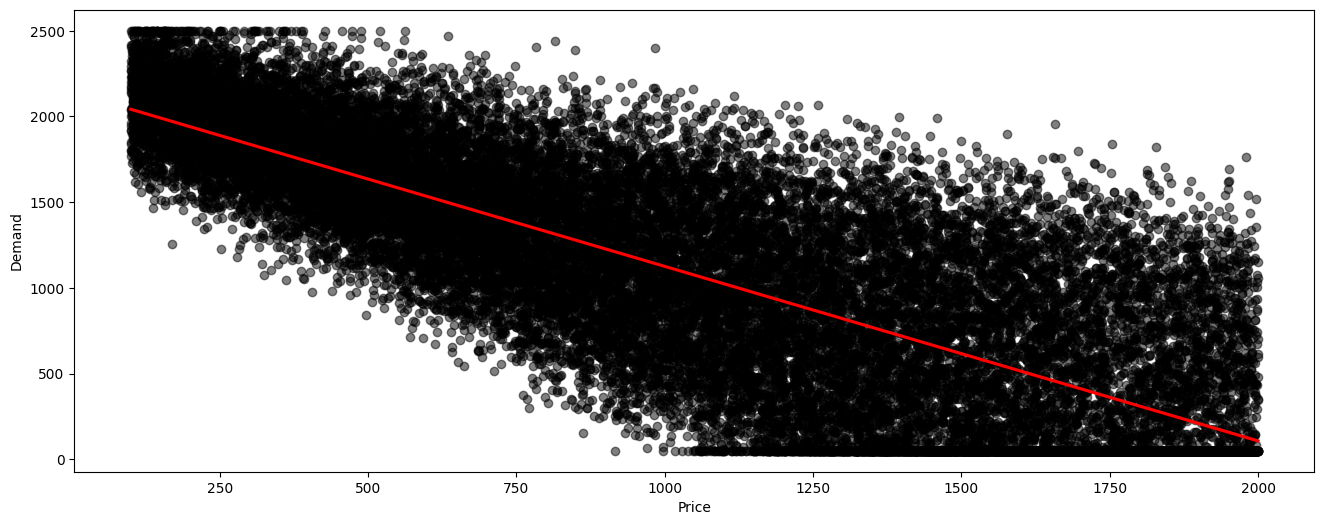

In [36]:
plt.figure(figsize=(16,6))
sns.regplot(data=df,x=df['Price'],y=df['Demand'],
            scatter_kws={"color": "black", "alpha": 0.5},
            line_kws={"color": "red"})

### ⭐ <u>Observation</u>: As Price Increases, Demand Decreases.

<Axes: xlabel='Elasticity Index', ylabel='Count'>

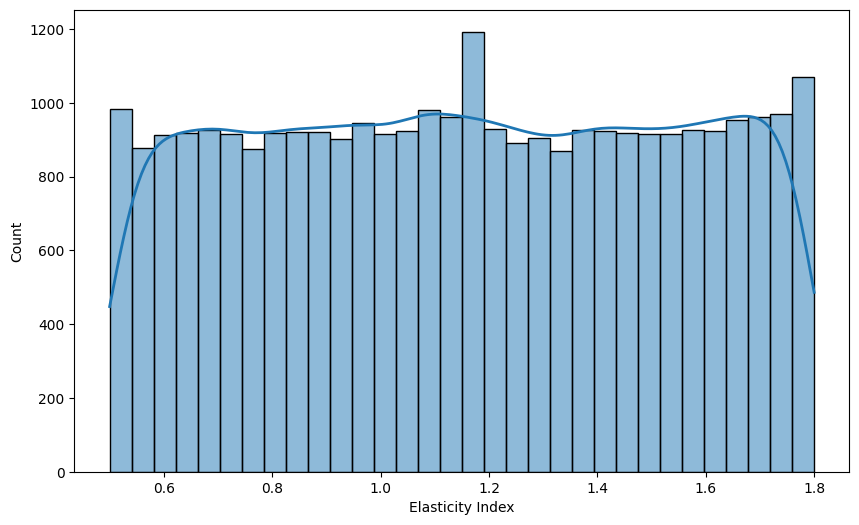

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x=df['Elasticity Index'],kde=True,line_kws={'color': 'red', 'linewidth': 2})

In [38]:
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde
import numpy as np

# 1. Create the base Histogram with Plotly Express
fig = px.histogram(
    df,
    x='Elasticity Index',
    title='Interactive Histogram with KDE',
    marginal='rug', # Optional: adds rug plot on top
    nbins=30,       # Adjust number of bins as needed
    opacity=0.75,
    color_discrete_sequence=['#636efa'] # Default blue
)

# 2. Calculate and Add the KDE (Density Curve)
data = df['Elasticity Index'].dropna()
kde = gaussian_kde(data)
x_grid = np.linspace(data.min(), data.max(), 1000)
y_density = kde(x_grid)

# Normalize density to match histogram scale
# Multiplying by total data points * bin width to match density histogram
bin_width = (data.max() - data.min()) / 30 
y_normalized = y_density * len(data) * bin_width

fig.add_trace(
    go.Scatter(
        x=x_grid, 
        y=y_normalized, 
        mode='lines', 
        name='KDE',
        line=dict(color='green', width=2)
    )
)

# 3. Update Layout for styling
fig.update_layout(
    xaxis_title='Elasticity Index',
    yaxis_title='Count',
    template='plotly_white',
    width=1000,
    height=600
)

# Show the plot
fig.show()


<Axes: xlabel='Elasticity Index', ylabel='Demand'>

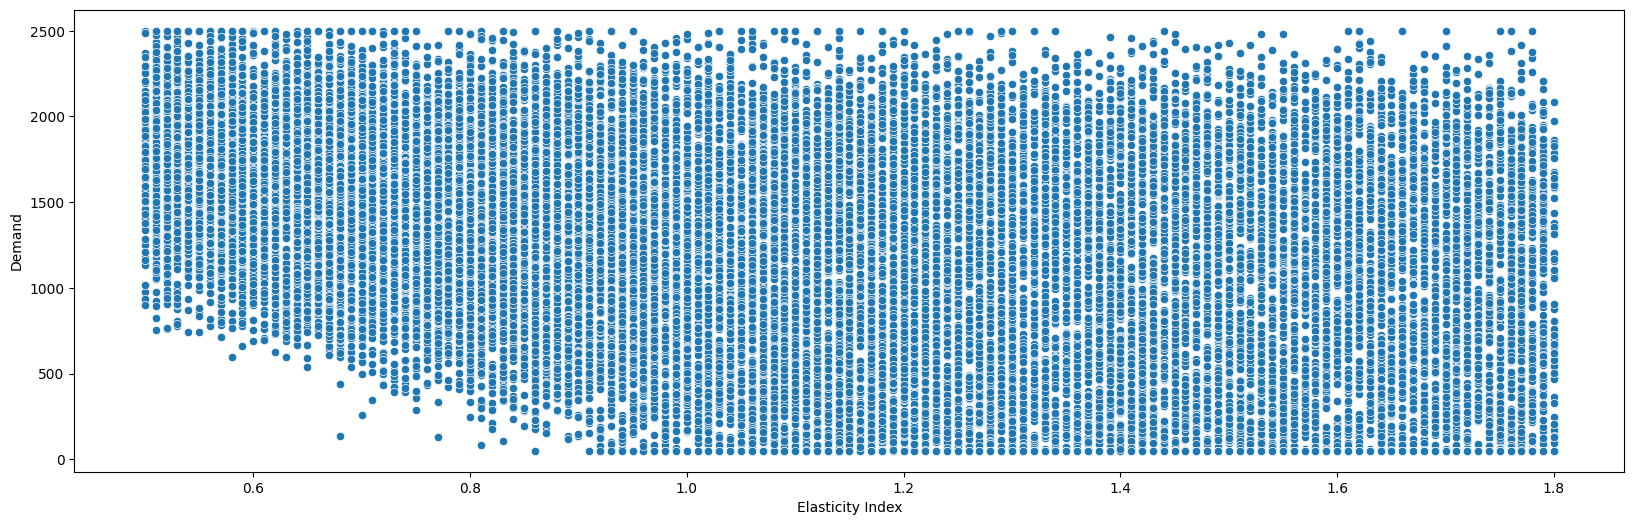

In [40]:
plt.figure(figsize=(20,6))
sns.scatterplot(x=df['Elasticity Index'], y=df['Demand'],data=df)

## Model Training:

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [42]:
df.head()

,Price,Competitor Price,Discount,Elasticity Index,Storage Cost,Return Rate (%),Customer Reviews,Demand
0,244.99,255.88,0.00,1.21,8.31,23.14,4.77,1720
1,1581.85,1588.73,0.14,1.15,11.34,2.13,3.49,484
2,932.98,933.96,0.09,1.12,13.67,12.61,4.07,1102
3,1474.58,1471.14,0.28,0.60,28.41,2.92,2.85,1243
4,1958.18,1997.32,0.15,1.26,18.70,20.68,4.61,50


In [ ]:
# df.drop(["Price_bin_100","Price_bin_200"],axis = 1,inplace=True)

In [43]:
x = df.drop(["Demand"],axis=1)
y = df['Demand']

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((24000, 7), (24000,), (6000, 7), (6000,))

In [46]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",10
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [47]:
rf.score(x_test,y_test)

0.9632305294551677

In [56]:
rf = RandomForestRegressor(n_estimators=20)
rf.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",20
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [57]:
rf.score(x_test,y_test)

0.9655444117431796

In [58]:
import joblib

joblib.dump(rf,"rf_model_on_variety_synthetic_data.joblib")

['rf_model_on_variety_synthetic_data.joblib']